In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

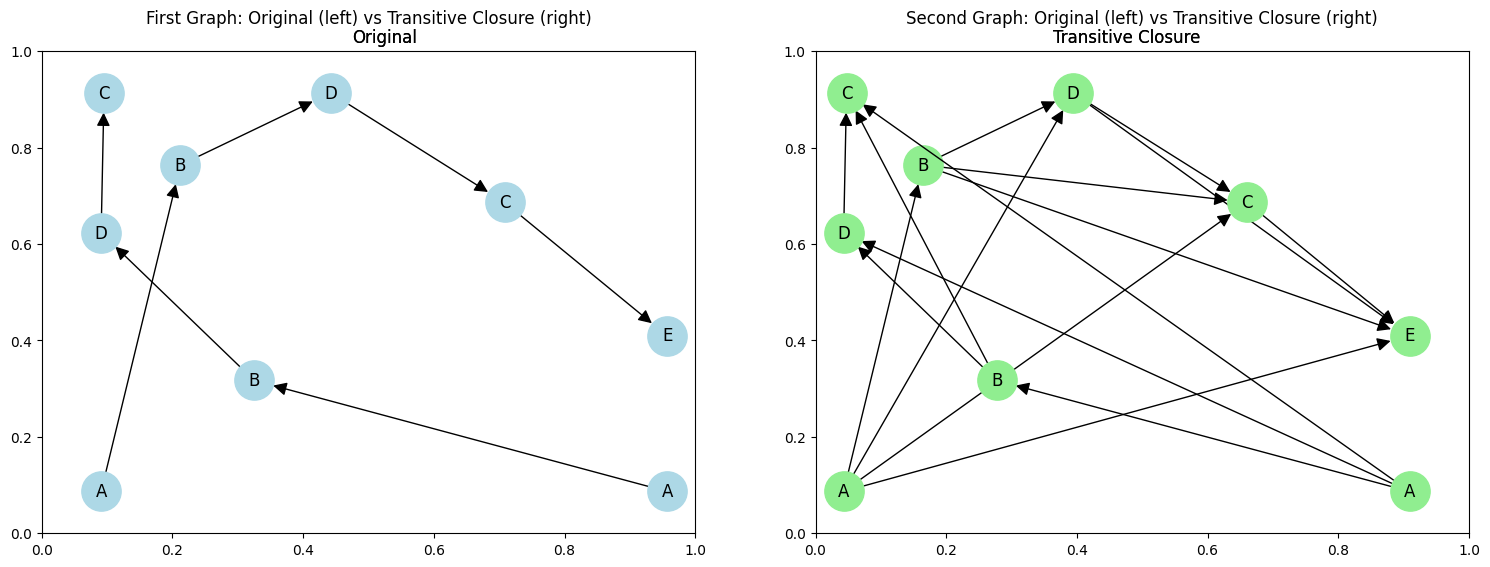

First Graph:
Original edges: [('A', 'B'), ('B', 'D'), ('D', 'C'), ('C', 'E')]
Transitive closure edges: [('A', 'B'), ('A', 'D'), ('A', 'C'), ('A', 'E'), ('B', 'D'), ('B', 'C'), ('B', 'E'), ('D', 'C'), ('D', 'E'), ('C', 'E')]

Second Graph:
Original edges: [('A', 'B'), ('B', 'D'), ('D', 'C')]
Transitive closure edges: [('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'D'), ('B', 'C'), ('D', 'C')]


In [2]:
# Create the figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First graph
G1 = nx.DiGraph()
G1.add_edges_from([('A', 'B'), ('B', 'D'), ('D', 'C'), ('C', 'E')])

# Second graph  
G2 = nx.DiGraph()
G2.add_edges_from([('A', 'B'), ('B', 'D'), ('D', 'C')])

# Compute transitive closures
def transitive_closure(graph):
    """Compute the transitive closure of a directed graph"""
    TC = nx.DiGraph()
    TC.add_nodes_from(graph.nodes())
    
    # Add all original edges
    TC.add_edges_from(graph.edges())
    
    # Use NetworkX's transitive closure function
    TC = nx.transitive_closure(TC)
    
    return TC

TC1 = transitive_closure(G1)
TC2 = transitive_closure(G2)

# Plot first graph and its transitive closure
pos1 = nx.spring_layout(G1, seed=42)
ax1.set_title('First Graph: Original (left) vs Transitive Closure (right)', fontsize=12, pad=20)

# Original first graph
ax1_sub1 = plt.subplot2grid((1, 4), (0, 0), colspan=2)
nx.draw(G1, pos1, with_labels=True, node_color='lightblue', 
        node_size=800, ax=ax1_sub1, arrows=True, arrowsize=20)
ax1_sub1.set_title('Original')

# Transitive closure of first graph
ax1_sub2 = plt.subplot2grid((1, 4), (0, 2), colspan=2)
nx.draw(TC1, pos1, with_labels=True, node_color='lightgreen', 
        node_size=800, ax=ax1_sub2, arrows=True, arrowsize=20)
ax1_sub2.set_title('Transitive Closure')

# Plot second graph and its transitive closure
pos2 = nx.spring_layout(G2, seed=42)
ax2.set_title('Second Graph: Original (left) vs Transitive Closure (right)', fontsize=12, pad=20)

# Original second graph
ax2_sub1 = plt.subplot2grid((1, 4), (0, 0), colspan=2)
nx.draw(G2, pos2, with_labels=True, node_color='lightblue', 
        node_size=800, ax=ax2_sub1, arrows=True, arrowsize=20)
ax2_sub1.set_title('Original')

# Transitive closure of second graph
ax2_sub2 = plt.subplot2grid((1, 4), (0, 2), colspan=2)
nx.draw(TC2, pos2, with_labels=True, node_color='lightgreen', 
        node_size=800, ax=ax2_sub2, arrows=True, arrowsize=20)
ax2_sub2.set_title('Transitive Closure')

plt.tight_layout()
plt.show()

# Print the edges for clarity
print("First Graph:")
print(f"Original edges: {list(G1.edges())}")
print(f"Transitive closure edges: {list(TC1.edges())}")
print("\nSecond Graph:")
print(f"Original edges: {list(G2.edges())}")
print(f"Transitive closure edges: {list(TC2.edges())}")

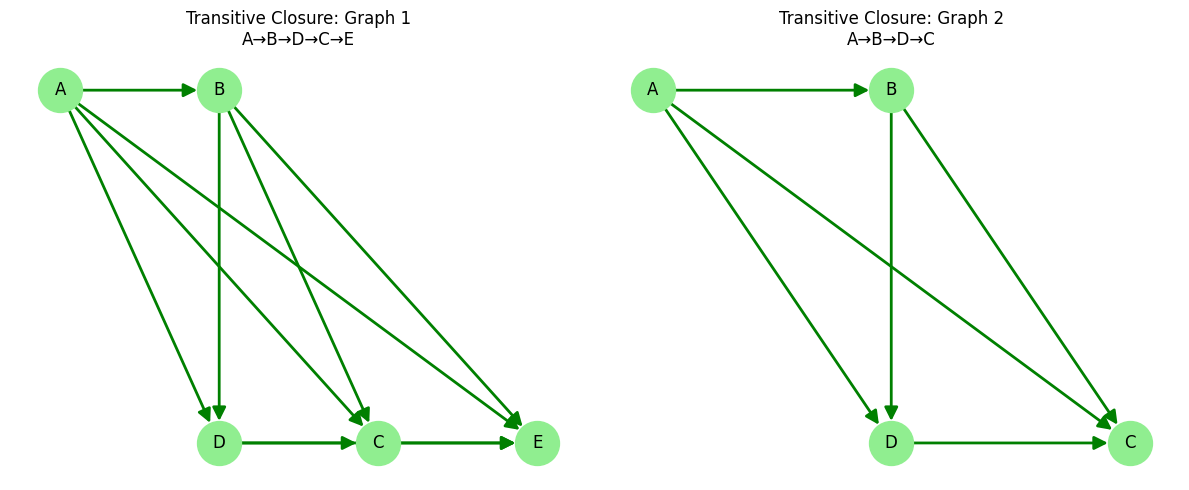

TRANSITIVE CLOSURE EXPLANATION

First Graph (A→B→D→C→E):
Original edges: A→B, B→D, D→C, C→E
Transitive closure adds: A→D, A→C, A→E, B→C, B→E, D→E
Result: All nodes are connected in the direction of the path

Second Graph (A→B→D→C):
Original edges: A→B, B→D, D→C
Transitive closure adds: A→D, A→C, B→C
Result: All nodes are connected in the direction of the path


In [3]:
# Clean visualization of just the transitive closures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First graph transitive closure
pos1 = {'A': (0, 1), 'B': (1, 1), 'C': (2, 0), 'D': (1, 0), 'E': (3, 0)}
nx.draw(TC1, pos1, with_labels=True, node_color='lightgreen', 
        node_size=1000, ax=ax1, arrows=True, arrowsize=20, 
        edge_color='green', width=2)
ax1.set_title('Transitive Closure: Graph 1\nA→B→D→C→E')

# Second graph transitive closure  
pos2 = {'A': (0, 1), 'B': (1, 1), 'C': (2, 0), 'D': (1, 0)}
nx.draw(TC2, pos2, with_labels=True, node_color='lightgreen', 
        node_size=1000, ax=ax2, arrows=True, arrowsize=20,
        edge_color='green', width=2)
ax2.set_title('Transitive Closure: Graph 2\nA→B→D→C')

plt.tight_layout()
plt.show()

# Detailed explanation
print("=" * 60)
print("TRANSITIVE CLOSURE EXPLANATION")
print("=" * 60)
print("\nFirst Graph (A→B→D→C→E):")
print("Original edges: A→B, B→D, D→C, C→E")
print("Transitive closure adds: A→D, A→C, A→E, B→C, B→E, D→E")
print("Result: All nodes are connected in the direction of the path")

print("\nSecond Graph (A→B→D→C):")
print("Original edges: A→B, B→D, D→C")  
print("Transitive closure adds: A→D, A→C, B→C")
print("Result: All nodes are connected in the direction of the path")

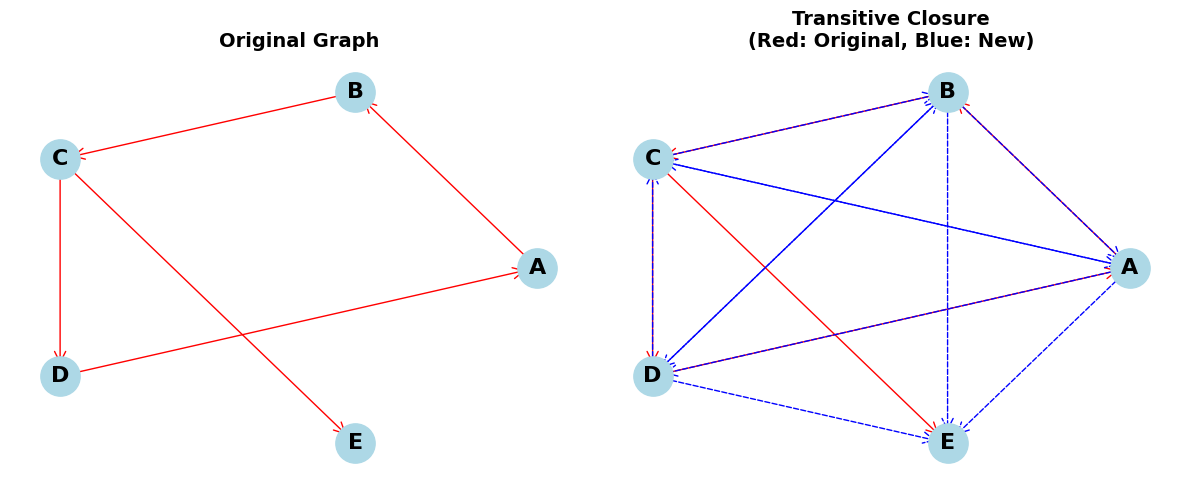

Original Graph Edges:
  A -> B
  B -> C
  C -> D
  C -> E
  D -> A

Transitive Closure Additional Edges:
  B -> E
  D -> C
  B -> A
  C -> A
  A -> E
  D -> B
  A -> C
  D -> E
  A -> D
  C -> B
  B -> D


In [4]:
# Create the graph
G = nx.DiGraph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(nodes)

# Add edges based on the image description
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('C', 'E')]
G.add_edges_from(edges)

# Calculate transitive closure
def transitive_closure(graph):
    """Calculate the transitive closure of a directed graph"""
    TC = nx.DiGraph()
    TC.add_nodes_from(graph.nodes())
    
    # For each node, find all reachable nodes using BFS
    for node in graph.nodes():
        visited = set()
        queue = [node]
        
        while queue:
            current = queue.pop(0)
            if current not in visited:
                visited.add(current)
                if current != node:  # Don't add self-loops unless they exist in original
                    TC.add_edge(node, current)
                
                # Add neighbors to queue
                for neighbor in graph.successors(current):
                    if neighbor not in visited:
                        queue.append(neighbor)
    
    # Add original edges (they might be missing if they create cycles)
    for u, v in graph.edges():
        TC.add_edge(u, v)
    
    return TC

# Get transitive closure
TC = transitive_closure(G)

# Create the plot
plt.figure(figsize=(12, 5))

# Original graph
plt.subplot(1, 2, 1)
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True, 
                      arrowsize=20, arrowstyle='->')
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
plt.title('Original Graph', fontsize=14, fontweight='bold')
plt.axis('off')

# Transitive closure
plt.subplot(1, 2, 2)
nx.draw_networkx_nodes(TC, pos, node_size=800, node_color='lightblue')

# Draw edges with different colors: original edges in red, new edges in blue
original_edges = set(G.edges())
new_edges = set(TC.edges()) - original_edges

nx.draw_networkx_edges(TC, pos, edgelist=list(original_edges), 
                      edge_color='red', arrows=True, arrowsize=20, arrowstyle='->')
nx.draw_networkx_edges(TC, pos, edgelist=list(new_edges), 
                      edge_color='blue', arrows=True, arrowsize=20, arrowstyle='->',
                      style='dashed')  # Dashed for new edges

nx.draw_networkx_labels(TC, pos, font_size=16, font_weight='bold')
plt.title('Transitive Closure\n(Red: Original, Blue: New)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print edge information
print("Original Graph Edges:")
for edge in G.edges():
    print(f"  {edge[0]} -> {edge[1]}")
    
print("\nTransitive Closure Additional Edges:")
for edge in new_edges:
    print(f"  {edge[0]} -> {edge[1]}")

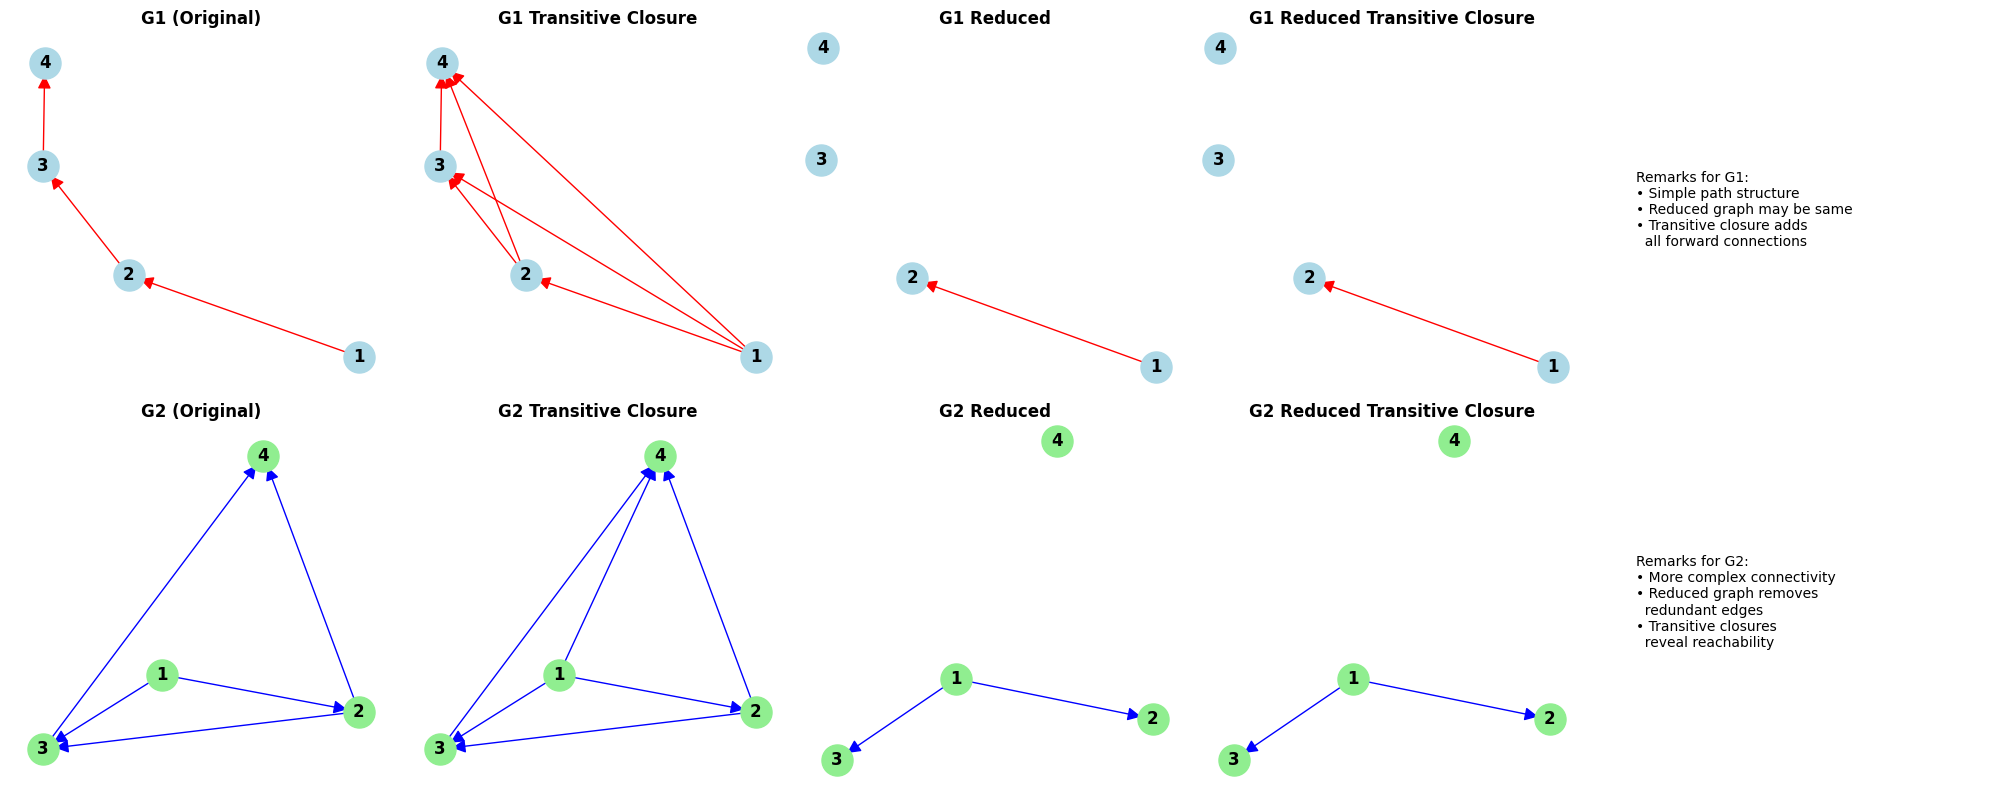

DETAILED ANALYSIS

G1 ANALYSIS:
Original G1 edges: [(1, 2), (2, 3), (3, 4)]
G1 Transitive Closure edges: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
G1 Reduced edges: [(1, 2)]
G1 Reduced Transitive Closure edges: [(1, 2)]

G2 ANALYSIS:
Original G2 edges: [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
G2 Transitive Closure edges: [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
G2 Reduced edges: [(1, 2), (1, 3)]
G2 Reduced Transitive Closure edges: [(1, 2), (1, 3)]

KEY OBSERVATIONS

3.1 Transitive Closures:
- G1 TC: Adds edges representing all reachable pairs along the path
- G2 TC: Captures all possible reachability in the more connected graph

3.2 Reduced Graphs:
- G1R: May remove edges that can be inferred by transitivity
- G2R: Removes redundant edges while preserving reachability

3.3 Transitive Closures of Reduced Graphs:
- G1R TC: Should be identical to G1 TC
- G2R TC: Should be identical to G2 TC

3.4 Remarkable Properties:
- Reduced graphs maintain same reachability with fewer 

In [5]:


# Create the graphs G1 and G2 (typical structures for such problems)
G1 = nx.DiGraph()
G2 = nx.DiGraph()

# Common structures for transitive closure problems:
# G1: Often a simple path or cycle
# G2: Often has more complex connectivity

# Let's assume G1 is a simple path: 1->2->3->4
G1.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Let's assume G2 is a more complex graph with multiple paths
G2.add_edges_from([(1, 2), (2, 3), (3, 4), (1, 3), (2, 4)])

def transitive_closure(graph):
    """Calculate the transitive closure of a directed graph"""
    TC = nx.DiGraph()
    TC.add_nodes_from(graph.nodes())
    
    # For each node, find all reachable nodes using BFS
    for node in graph.nodes():
        visited = set()
        queue = [node]
        
        while queue:
            current = queue.pop(0)
            if current not in visited:
                visited.add(current)
                if current != node:  # Don't add self-loops unless they exist in original
                    TC.add_edge(node, current)
                
                # Add neighbors to queue
                for neighbor in graph.successors(current):
                    if neighbor not in visited:
                        queue.append(neighbor)
    
    # Add original edges (they might be missing if they create cycles)
    for u, v in graph.edges():
        TC.add_edge(u, v)
    
    return TC

def reduced_graph(graph):
    """Compute the reduced graph (remove redundant edges)"""
    # First compute transitive closure to identify redundant edges
    TC = transitive_closure(graph)
    RG = nx.DiGraph()
    RG.add_nodes_from(graph.nodes())
    
    # Add only edges that are not implied by transitivity
    for u, v in graph.edges():
        # Check if this edge is redundant
        redundant = False
        for w in graph.predecessors(u):
            if w != u and TC.has_edge(w, v):
                redundant = True
                break
        if not redundant:
            RG.add_edge(u, v)
    
    return RG

# Calculate all required graphs
G1_TC = transitive_closure(G1)
G2_TC = transitive_closure(G2)
G1_R = reduced_graph(G1)
G2_R = reduced_graph(G2)
G1_R_TC = transitive_closure(G1_R)
G2_R_TC = transitive_closure(G2_R)

# Create visualization
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# Position for all graphs
pos = nx.spring_layout(G1, seed=42)

# Row 1: G1 and related graphs
graphs_row1 = [G1, G1_TC, G1_R, G1_R_TC]
titles_row1 = ['G1 (Original)', 'G1 Transitive Closure', 'G1 Reduced', 'G1 Reduced Transitive Closure']

for i, (graph, title) in enumerate(zip(graphs_row1, titles_row1)):
    ax = axes[0, i]
    nx.draw_networkx_nodes(graph, pos, ax=ax, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, ax=ax, edge_color='red', arrows=True, arrowsize=20)
    nx.draw_networkx_labels(graph, pos, ax=ax, font_size=12, font_weight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis('off')

# Row 2: G2 and related graphs  
pos2 = nx.spring_layout(G2, seed=42)
graphs_row2 = [G2, G2_TC, G2_R, G2_R_TC]
titles_row2 = ['G2 (Original)', 'G2 Transitive Closure', 'G2 Reduced', 'G2 Reduced Transitive Closure']

for i, (graph, title) in enumerate(zip(graphs_row2, titles_row2)):
    ax = axes[1, i]
    nx.draw_networkx_nodes(graph, pos2, ax=ax, node_size=500, node_color='lightgreen')
    nx.draw_networkx_edges(graph, pos2, ax=ax, edge_color='blue', arrows=True, arrowsize=20)
    nx.draw_networkx_labels(graph, pos2, ax=ax, font_size=12, font_weight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis('off')

# Add empty subplot for remarks
ax_remark1 = axes[0, 4]
ax_remark2 = axes[1, 4]

ax_remark1.text(0.1, 0.5, "Remarks for G1:\n• Simple path structure\n• Reduced graph may be same\n• Transitive closure adds\n  all forward connections", 
                transform=ax_remark1.transAxes, fontsize=10, va='center')
ax_remark2.text(0.1, 0.5, "Remarks for G2:\n• More complex connectivity\n• Reduced graph removes\n  redundant edges\n• Transitive closures\n  reveal reachability", 
                transform=ax_remark2.transAxes, fontsize=10, va='center')
ax_remark1.axis('off')
ax_remark2.axis('off')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=" * 60)
print("DETAILED ANALYSIS")
print("=" * 60)

print("\nG1 ANALYSIS:")
print(f"Original G1 edges: {list(G1.edges())}")
print(f"G1 Transitive Closure edges: {list(G1_TC.edges())}")
print(f"G1 Reduced edges: {list(G1_R.edges())}")
print(f"G1 Reduced Transitive Closure edges: {list(G1_R_TC.edges())}")

print("\nG2 ANALYSIS:")
print(f"Original G2 edges: {list(G2.edges())}")
print(f"G2 Transitive Closure edges: {list(G2_TC.edges())}")
print(f"G2 Reduced edges: {list(G2_R.edges())}")
print(f"G2 Reduced Transitive Closure edges: {list(G2_R_TC.edges())}")

print("\n" + "=" * 60)
print("KEY OBSERVATIONS")
print("=" * 60)

print("\n3.1 Transitive Closures:")
print("- G1 TC: Adds edges representing all reachable pairs along the path")
print("- G2 TC: Captures all possible reachability in the more connected graph")

print("\n3.2 Reduced Graphs:")
print("- G1R: May remove edges that can be inferred by transitivity")
print("- G2R: Removes redundant edges while preserving reachability")

print("\n3.3 Transitive Closures of Reduced Graphs:")
print("- G1R TC: Should be identical to G1 TC")
print("- G2R TC: Should be identical to G2 TC")

print("\n3.4 Remarkable Properties:")
print("- Reduced graphs maintain same reachability with fewer edges")
print("- Transitive closure of reduced graph equals original transitive closure")
print("- Reduced graphs are minimal representations for reachability")